# Q-Q Plots

## Preparation


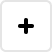
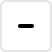
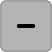
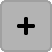
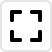
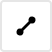
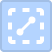
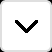
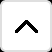
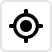

In [1]:
import pandas as pd
from scipy.stats import norm, skewnorm, laplace, uniform

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
hwy = "hwy"
cty = "cty"
drv = "drv"
df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

## Two types of Q-Q plots

In [4]:
ggplot(df, aes(sample=hwy)) + \
    geom_qq(size=5, color='black', alpha=.3) + \
    geom_qq_line(size=1) + \
    ggtitle("Distribution of highway miles per gallon", \
            "Comparison of sample quantiles with normal distribution quantiles")

In [5]:
ggplot(df, aes(x=cty, y=hwy)) + \
    geom_qq2(size=5, color='black', alpha=.3) + \
    geom_qq2_line(size=1) + \
    ggtitle("City miles vs. highway miles (per gallon)", \
            "Comparison of quantiles of two sample distributions")

## Deviations investigation

In [6]:
n = 1_000
norm_df = pd.DataFrame({"sample": norm.rvs(size=n, random_state=42)})
skewed_df = pd.DataFrame({"sample": skewnorm.rvs(7, size=n, random_state=42)})
neg_kurtosis_df = pd.DataFrame({"sample": uniform.rvs(size=n, random_state=42)})
pos_kurtosis_df = pd.DataFrame({"sample": laplace.rvs(size=n, random_state=42)})

In [7]:
p1 = ggplot(norm_df)
p11 = p1 + geom_histogram(aes(x="sample")) + ggtitle("Normal: histogram")
p12 = p1 + geom_qq(aes(sample="sample")) + geom_qq_line(aes(sample="sample")) + ggtitle("Normal: Q-Q plot")
p2 = ggplot(skewed_df)
p21 = p2 + geom_histogram(aes(x="sample")) + ggtitle("Skewed: histogram")
p22 = p2 + geom_qq(aes(sample="sample")) + geom_qq_line(aes(sample="sample")) + ggtitle("Skewed: Q-Q plot")
p3 = ggplot(neg_kurtosis_df)
p31 = p3 + geom_histogram(aes(x="sample")) + ggtitle("-Kurtosis: histogram")
p32 = p3 + geom_qq(aes(sample="sample")) + geom_qq_line(aes(sample="sample")) + ggtitle("-Kurtosis: Q-Q plot")
p4 = ggplot(pos_kurtosis_df)
p41 = p4 + geom_histogram(aes(x="sample")) + ggtitle("+Kurtosis: histogram")
p42 = p4 + geom_qq(aes(sample="sample")) + geom_qq_line(aes(sample="sample")) + ggtitle("+Kurtosis: Q-Q plot")

plot_matrix([p11, p12, p21, p22, p31, p32, p41, p42])

## Choose a distribution

In [8]:
p1 = ggplot(df, aes(sample=hwy)) + \
    geom_qq(distribution="norm") + \
    geom_qq_line(distribution="norm", quantiles=[.1, .9]) + \
    ggtitle("Normal distribution")
p2 = ggplot(df, aes(sample=hwy)) + \
    geom_qq(distribution="uniform") + \
    geom_qq_line(distribution="uniform", quantiles=[.1, .9]) + \
    ggtitle("Uniform distribution")
p3 = ggplot(df, aes(sample=hwy)) + \
    geom_qq(distribution="t") + \
    geom_qq_line(distribution="t", quantiles=[.1, .9]) + \
    ggtitle("Student's t-distribution distribution")
p4 = ggplot(df, aes(sample=hwy)) + \
    geom_qq(distribution="exp") + \
    geom_qq_line(distribution="exp", quantiles=[.1, .9]) + \
    ggtitle("Exponential distribution")

plot_matrix([p1, p2, p3, p4])

## Q-Q stats with other geometries

In [9]:
ggplot(df, aes(x=cty, y=hwy, color=drv)) + \
    geom_line(stat="qq2") + \
    geom_point(stat="qq2", shape=15) + \
    geom_line(stat="qq2_line", color='#636363', linetype=5) + \
    facet_grid(x=drv) + \
    xlab("cty quantiles") + ylab("hwy quantiles")